In [71]:
import numpy as np
import keras
import keras.optimizers
from keras.models import Sequential
from keras.models import model_from_json
from keras.layers import Dense, Activation, MaxPooling2D,Dropout,Conv2D,BatchNormalization,Reshape,UpSampling2D,ZeroPadding2D,Conv2DTranspose
from keras.backend import resize_images
from sklearn.utils import class_weight
import json
import time
import os
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import scipy.io
import glob
import numpy as np
import scipy.stats

In [3]:
cd ../eeg-channel-interpolation-using-deep-encoder-decoder-networks/

/home/sarisadiya/Projects/ECR/eeg-channel-interpolation-using-deep-encoder-decoder-networks


In [72]:
ls model

topology/  weights/


In [73]:
exp_top    = './model/topology/model.json'        # topology
exp_weight = './model/weights/nn_weights-800.hdf5' # weight

In [74]:
with open(exp_top, 'r') as json_file:
    architecture = json.load(json_file)
    nn = model_from_json(architecture)
    nn.load_weights(exp_weight, by_name=True)

In [75]:
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_1 (ZeroPaddin (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          1168      
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 16)          64        
_________________________________________________________________
activation_1 (Activation)    (None, 8, 8, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          4640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 8, 32)         

In [76]:
from baselines.ecr_baseline import baselines

In [77]:
orgFile = glob.glob('../baseline/subject00_1_intrp.mat')[0]
orgEEG = scipy.io.loadmat(orgFile)['EEG'][0]

In [79]:
#orgEEG['chanlocs'][0]

In [80]:
orgEEG['data'][0].shape

(21, 91000)

In [81]:
baseline = baselines(orgEEG)

In [95]:
eegData = baseline.normalize_data(orgEEG,20,30)

In [96]:
eegData[2].shape

(8, 8, 8)

In [97]:
popedData = baseline.occlude(eegData,3,3)

In [98]:
popedData[1][:,:,0]

array([[ 0.06017202,  0.06017202,  0.06017202,  0.06017202,  0.06017202,
         0.06017202,  0.06017202,  0.06017202],
       [ 0.06017202,  0.06017202, -1.05979623,  0.06017202,  0.06017202,
        -0.5808349 ,  0.06017202,  0.06017202],
       [ 0.06017202, -0.7170937 , -1.60442477, -1.24187448, -1.24187448,
        -1.16752275,  2.13094926,  0.06017202],
       [ 0.06017202, -0.49758637, -1.49931111,  0.        , -0.6895707 ,
        -0.44820369, -1.05716565,  0.06017202],
       [ 0.06017202, -0.49758637, -1.49931111, -0.6895707 , -0.6895707 ,
        -0.44820369, -1.05716565,  0.06017202],
       [ 0.06017202, -1.44963847, -1.70541392, -0.18030348, -0.18030348,
        -0.04880974, -1.03846295,  0.06017202],
       [ 0.06017202,  0.06017202, -1.77429762,  0.06017202,  0.06017202,
         0.16666314,  0.06017202,  0.06017202],
       [ 0.06017202,  0.06017202,  0.06017202,  0.06017202,  0.06017202,
         0.06017202,  0.06017202,  0.06017202]])

In [99]:
ORG = []
EGL = []
EUD = []
for ii in range(5):
    ORG.append(eegData[ii][3,3,:])
    EGL.append(baseline.new_EGL(popedData[ii],3,3,2))
    EUD.append(baseline.new_EUD(popedData[ii],3,3,2))
ORG = np.hstack(ORG)
EGL = np.hstack(EGL)
EUD = np.hstack(EUD)

In [100]:
eegInt = nn.predict(np.array(popedData))

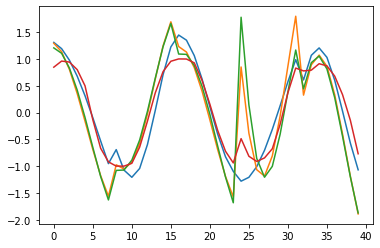

In [101]:
plt.plot(range(8*5),ORG)
plt.plot(range(8*5),EGL)
plt.plot(range(8*5),EUD)
plt.plot(range(8*5),eegInt[0:5,3,3,:].flatten())